### Matchenko Pastur
- Importar un dataset con muchas variables y datos
- Calcular PCA
    - Graficar
    - Calcular vectores y valores propios
- Calcular "q" y (soportes)
- 
-
-
-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import invgamma

In [28]:
df = pd.read_excel('data-test.xls')
print(df.columns)
print(df.info())
df.head()

# save as csv
df.to_csv('data.csv', index=False)

Index(['TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'MERCHANT NAME',
       'CARD NUMBER', 'TRANS CAC CODE 1', 'TRANS CAC DESC 1',
       'TRANS CAC CODE 2', 'TRANS CAC DESC 2', 'TRANS CAC CODE 3',
       'Directorate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TRANS DATE          4791 non-null   datetime64[ns]
 1   TRANS VAT DESC      4699 non-null   object        
 2   ORIGINAL GROSS AMT  4791 non-null   float64       
 3   MERCHANT NAME       4791 non-null   object        
 4   CARD NUMBER         4791 non-null   object        
 5   TRANS CAC CODE 1    4790 non-null   object        
 6   TRANS CAC DESC 1    4790 non-null   object        
 7   TRANS CAC CODE 2    4791 non-null   object        
 8   TRANS CAC DESC 2    4791 non-null   object        
 9   TRANS CAC CODE 3    

In [4]:
from sklearn.preprocessing import LabelEncoder

def encode_variables(df):
    # Encode variables categóricas
    le = LabelEncoder()
    for column in df.select_dtypes(include='object').columns:
        df[column] = le.fit_transform(df[column])
    # Eliminar variables que no aportan información 
    df = df.drop('TRANS DATE', axis=1)
    
    return df

df_en = encode_variables(df)
display(df_en.head())
df_en.info()

,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2,52.84,833,392,22,65,412,11,0,0
1,2,10.00,833,392,22,65,412,11,0,0
2,2,20.01,901,392,22,65,412,11,0,0
3,2,57.96,833,392,22,65,412,11,0,0
4,2,60.50,828,579,22,65,415,266,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TRANS VAT DESC      4791 non-null   int64  
 1   ORIGINAL GROSS AMT  4791 non-null   float64
 2   MERCHANT NAME       4791 non-null   int64  
 3   CARD NUMBER         4791 non-null   int64  
 4   TRANS CAC CODE 1    4791 non-null   int64  
 5   TRANS CAC DESC 1    4791 non-null   int64  
 6   TRANS CAC CODE 2    4791 non-null   int64  
 7   TRANS CAC DESC 2    4791 non-null   int64  
 8   TRANS CAC CODE 3    4791 non-null   int64  
 9   Directorate         4791 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 374.4 KB


In [35]:
X = df_en[:3000].values
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm.shape


(3000, 10)

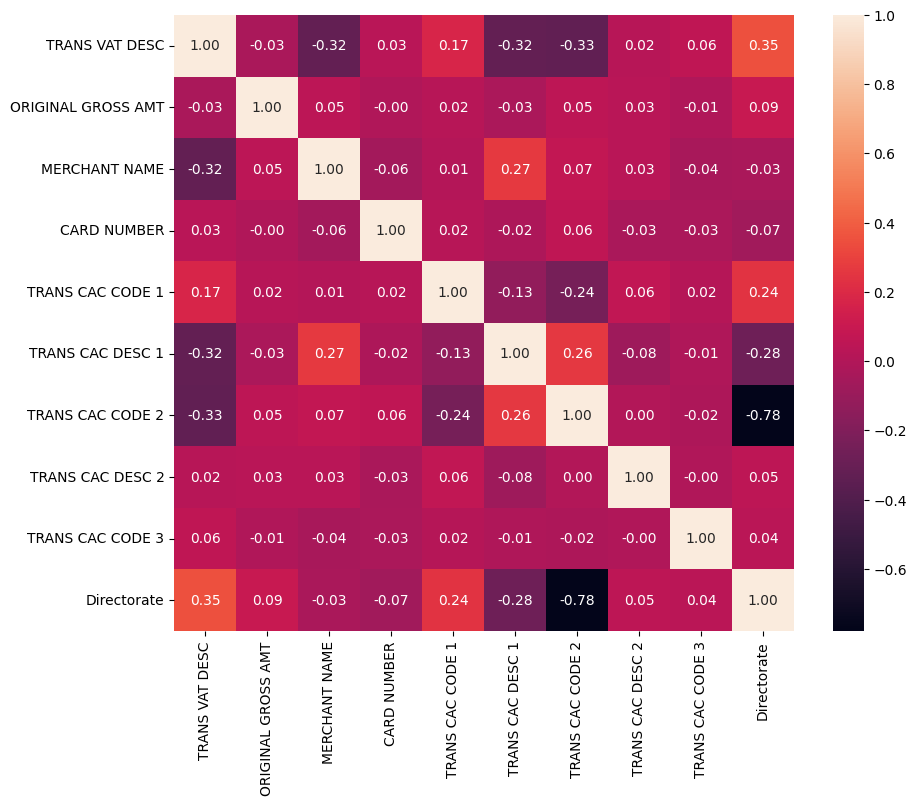

In [36]:
# X_norm correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_norm, columns=df_en.columns).corr(), annot=True, fmt=".2f")
plt.show()

In [37]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_norm)

C:\Users\user\AppData\Local\Temp\ipykernel_10876\354926268.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


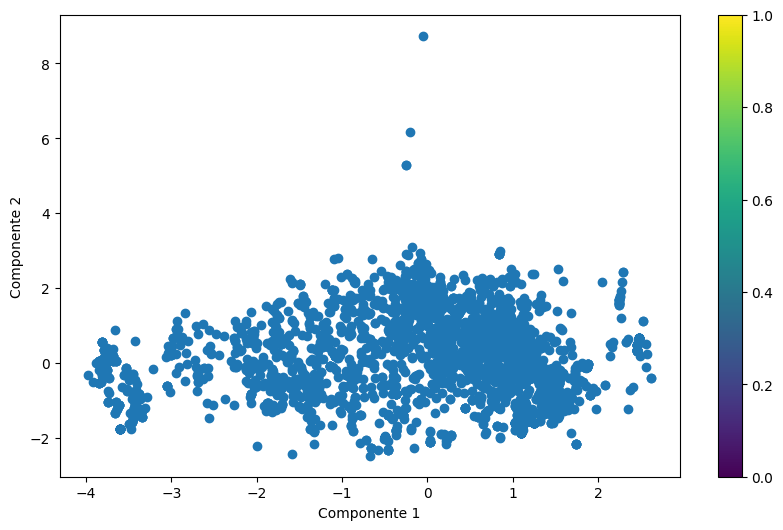

In [38]:
# grafica PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()
plt.show()

In [39]:
# Calcular los valores propios de la matriz de covarianza
eigenvalues = pca.explained_variance_

eigenvalues

array([2.39622409, 1.28451468, 1.05822085, 1.02077933, 0.98441874,
       0.96353748, 0.82385049, 0.6811041 , 0.58626797, 0.2044167 ])

In [40]:
# Filtrar valores propios según el teorema de Marchenko-Pastur
q = X.shape[1] / X.shape[0]
lambda_plus = (1 + np.sqrt(q))**2

print(q, lambda_plus)

0.0033333333333333335 1.1188033871712584


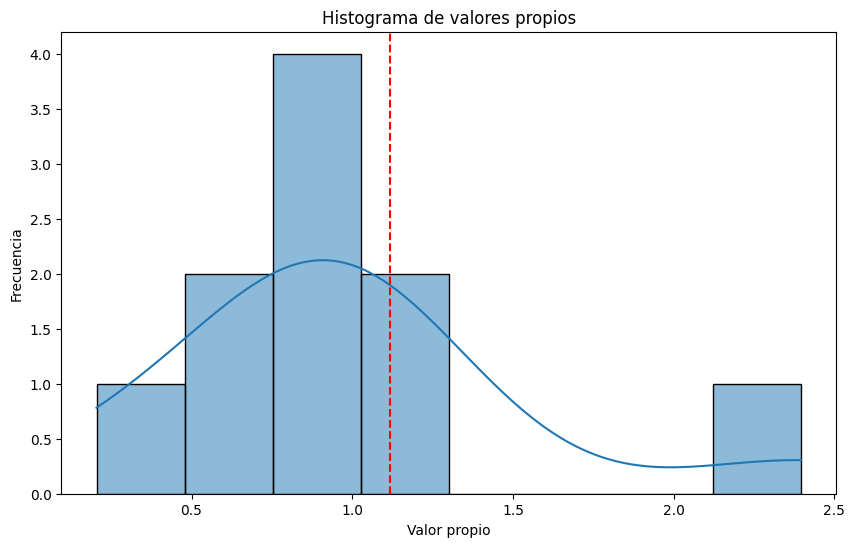

In [41]:
# Grafica el histograma de los valores propios con el filtro de Marchenko-Pastur
plt.figure(figsize=(10, 6))
sns.histplot(eigenvalues, kde=True)
plt.axvline(lambda_plus, color='red', linestyle='--')
plt.xlabel('Valor propio')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores propios')
plt.show()

In [43]:
# Retener componentes principales mayores a lambda_plus
X_pca_filtered = X_pca[:, eigenvalues > lambda_plus]

X_pca_filtered.shape

(3000, 2)

In [44]:
X_norm.shape

(3000, 10)

In [48]:
filtered_norm_df = np.dot(X_pca_filtered, np.dot(X_pca_filtered.T, X_norm[:3000]))
filtered_norm_df = pd.DataFrame(data=filtered_norm_df, columns=df_en.columns, index= df_en.index[:3000])

In [49]:
noise_df = df_en - filtered_norm_df

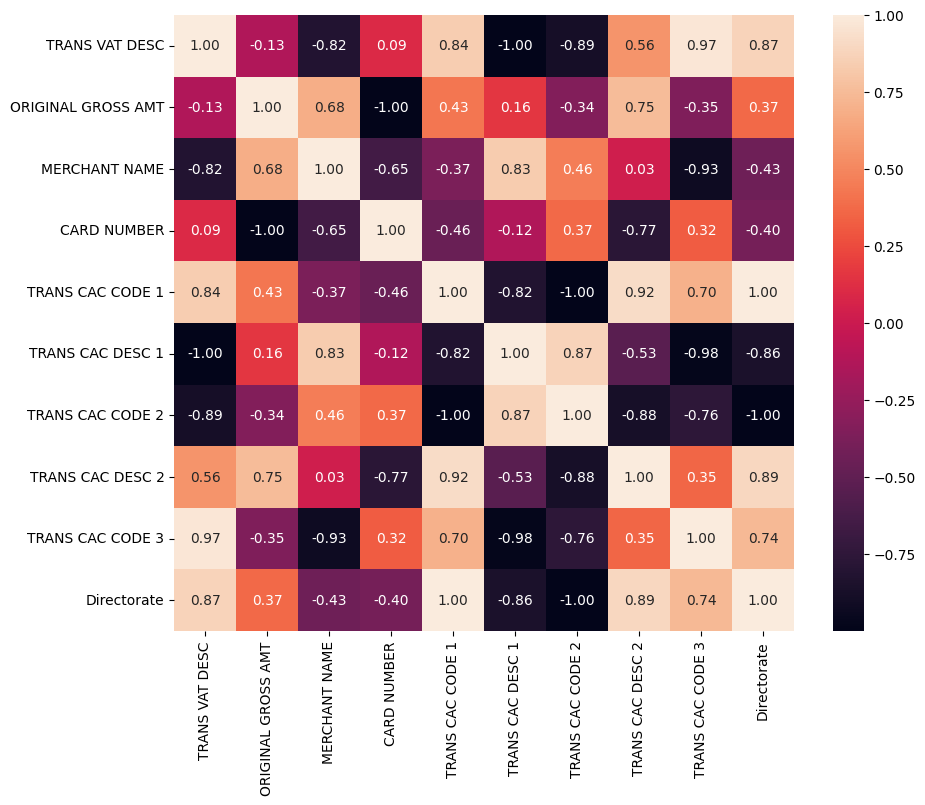

In [50]:
# X_norm correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(filtered_norm_df, columns=df_en.columns).corr(), annot=True, fmt=".2f")
plt.show()

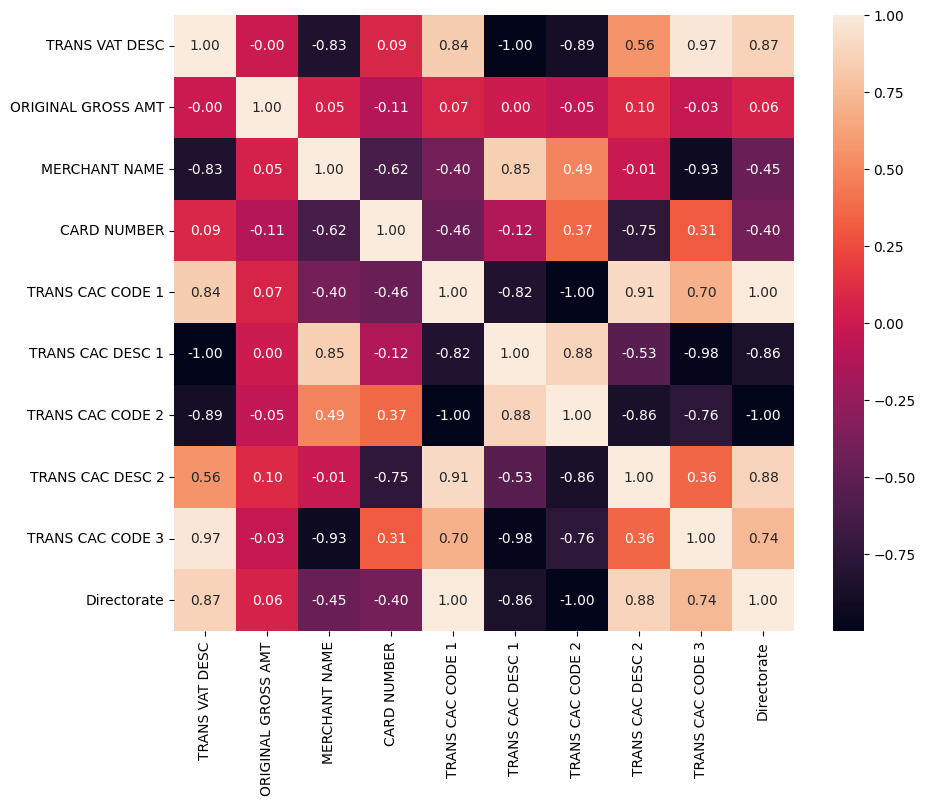

In [51]:
# noise_df correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(noise_df.corr(), annot=True, fmt=".2f")
plt.show()

In [52]:
#comprueba que noice_df normalizada es ruido
noise_df_norm = (noise_df - noise_df.mean(axis=0)) / noise_df.std(axis=0)

noise_df_norm.describe()

,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
count,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,0.000000,-9.473903e-18,-2.842171e-17,1.894781e-17,1.894781e-17,-1.894781e-17,-1.894781e-17,5.684342e-17,7.579123e-17,3.789561e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.761564,-1.044145e+00,-6.445575e+00,-2.283402e+00,-2.203209e+00,-2.495377e+00,-2.598371e+00,-4.893131e+00,-1.900208e+00,-1.928550e+00
25%,-0.831095,-2.909796e-01,-7.691593e-01,-7.561122e-01,-6.671636e-01,-6.710048e-01,-5.580181e-01,-6.656537e-01,-9.090880e-01,-6.806717e-01
50%,-0.165044,6.845975e-03,-2.077465e-02,-1.287026e-01,-3.545843e-01,1.533221e-01,3.476065e-01,-1.518013e-01,-6.508144e-02,-3.572003e-01
75%,0.645513,2.283062e-01,7.968274e-01,7.455676e-01,5.446654e-01,8.379557e-01,6.929888e-01,6.051353e-01,7.250772e-01,5.672793e-01
max,2.502335,3.529212e+01,2.264013e+00,7.967641e+00,2.680988e+00,1.780062e+00,1.878270e+00,2.590874e+00,3.768408e+00,2.623891e+00


In [53]:
#compara dos regresiones lineales una sobre df_en y otra sobre filtered_norm_df
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#importa el r2
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(df_en.drop('ORIGINAL GROSS AMT', axis=1), df_en['ORIGINAL GROSS AMT'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('MSE sobre df_en:', mean_squared_error(y_test, y_pred))
print('R2 sobre df_en:', r2_score(y_test, y_pred))


X_train, X_test, y_train, y_test = train_test_split(filtered_norm_df.drop('ORIGINAL GROSS AMT', axis=1), filtered_norm_df['ORIGINAL GROSS AMT'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('MSE sobre filtered_norm_df:', mean_squared_error(y_test, y_pred))
print('R2 sobre filtered_norm_df:', r2_score(y_test, y_pred))

MSE sobre df_en: 4453151.101357896
R2 sobre df_en: 0.009901503882340568
MSE sobre filtered_norm_df: 3.83159325966337e-26
R2 sobre filtered_norm_df: 1.0


#### ACA TENGO UN DATALEAK

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Eliminar columnas no relevantes para el análisis y filtrar datos numéricos y categóricos
data_cleaned = data.drop(columns=['TRANS DATE', 'CARD NUMBER'])
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test = train_test_split(data_cleaned, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA al conjunto de entrenamiento
pca = PCA(n_components=min(X_train_scaled.shape))
X_train_pca = pca.fit_transform(X_train_scaled)
eigenvalues = pca.explained_variance_

# Usar Marchenko-Pastur para filtrar ruido
q = X_train_scaled.shape[1] / X_train_scaled.shape[0]
lambda_plus = (1 + np.sqrt(q))**2

# Filtrar componentes principales relevantes
X_train_filtered = X_train_pca[:, eigenvalues > lambda_plus]

# Aplicar la misma transformación al conjunto de prueba
X_test_pca = np.dot(X_test_scaled, pca.components_.T)
X_test_filtered = X_test_pca[:, eigenvalues > lambda_plus]

# Mostrar la forma de los conjuntos de datos originales y los filtrados
(X_train_scaled.shape, X_train_filtered.shape), (X_test_scaled.shape, X_test_filtered.shape)
